<a href="https://colab.research.google.com/github/jazaineam1/Diplomado_ucentral_ME/blob/main/Cuadernos/M1_Clase_3_Manipulaci%C3%B3n_de_datos_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Universidad Central***
>## **Dirección de Educación Continua.**



![Imágen1](https://www.ucentral.edu.co/sites/default/files/logo_1.png)

## **Manipulación de datos en Python v2**
## **Módulo 1**

## ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?
En el desarrollo de este caso introduciremos las librerías pandas, numpy y matplotlib para el preprocesamiento, visualización de un conjunto de datos y el desarrollo de algunas medidas estadísticas descriptivas.



##  Introducción

La revisión del comportamiento de los clientes en cualquier empresa es de vital importancia para el desarrollo de estrategias  tanto de mejoramiento de productos como de publicidad y toma de decisiones. Evaluaremos la información obtenida de un conjunto de registro obtenidos de una empresa de telecomunicaciones que cuenta con la revisión de las siguientes variables:

1. totrev: Ingresos del cliente
2. totmou: Total de minutos usados por el cliente
3. area: Área geográfica
4. creditcd: Indicador de tarjeta de crédito
5. eqpdays: Número de días (antigüedad) del equipo actual

Es importante mencionar que la empresa contiene una gran cantidad de clientes y hacer el análisis uno a uno no es lo  óptimo. Con ayuda de la programación y el análisis de datos, se logrará llegar a conclusiones rápidas y acertadas para encontrar relaciones que a simple vista no son tenidas en cuenta.

### ¿Qué se quiere identificar? Teniendo en cuenta la información de la base de datos se quiere identificar si hay una relación entre el total de minutos usados por el cliente con la compañía y el ingreso total de los clientes, es decir, Será posible afirmar que cuando una persona
tiene un mayor ingreso mayor entonces es mayor la utilización de minutos o todo lo contrario?


####  Insumos para tratar este problema


Teniendo en cuenta que la compañía tenia estándares para la entrega de la información, se dispone de un  conjunto de tablas en formato CSV ordenado de la siguiente manera:
La información de este conjunto de datos puede encontrase en [aquí](https://www.kaggle.com/abhinav89/telecom-customer?select=Telecom_customer+churn.csv)

### Objetivos

En este caso usted tendrá que cargar varias bases de datos, hará una exploración básica sobre la información y fusionará las distintas bases para tener una visión general del problema. La idea es que desarrolle las siguientes habilidades:

1. Manejo de la librería pandas de Python para cargar y leer datos;
2. Ideas elementales para una útil transformación de los datos;
3. Construcción y presentación de argumentos válidos que le brindarán una solución para la pregunta expresada más arriba y llegar a una conclusión.
4. Visualización de gráficas elementales que le permitirá entender mejor la información contenida en los datos.

#### Importación de paquetes


Una de las mejores opciones para trabajar con datos tabulares en Python es usar el módulo pandas. La librería `pandas` provee estructuras de datos, genera gráficos de alta calidad con `matplotlib` y se integra de buena forma con otras librerías que usan arrays de `numpy`.

Debemos revisar si la librería se encuentra en nuestro sistema usando el comando

```python
!pip show librería
```

In [1]:
!pip show pandas
# !pip show numpy
# !pip show matplotlib

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

En el caso de que la librería no se encuentre instalada ejecutamos el comando

```python
!pip install librería
```

Para importar las librerías usamos el comando
```python
import librería as alias
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Luego de que tener los paquetes activados dentro de nuestro ambiente de python podremos usar las fucnciones que se encuentren en la librería.

### Introducción a pandas

Poner información sobre pandas e indicar la diferencia entre series y dataframe

![](https://www.cdn.geeksforgeeks.org/wp-content/uploads/creating_dataframe1.png)

A continuación, mostramos el código a ejecutar para crear una ` Serie`

In [3]:
Serie1 = pd.Series(
index=[0, 1, 2, 3, 4], name="Variable1", data=["A","B","C","D","E"]
)
Serie1

,Variable1
0,A
1,B
2,C
3,D
4,E


In [4]:
Data_Frame = pd.DataFrame(
index=[0, 1, 2, 3, 4], columns=["Variable2","Variable3"], data=[[1, 1], ["2", 2],[3,3],[4,4],[5,5]]
)
Data_Frame

,Variable2,Variable3
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


Para revisar el tipo de objeto que contiene nuestro DataFrame podemos ejecutar

In [5]:
Data_Frame.dtypes
#Serie1.dtypes

,0
Variable2,object
Variable3,int64


### Carga de información en `pandas`

Para nuestro  ejercicio usaremos los siguientes conjuntos de datos alojado [acá](https://github.com/jazaineam1/Andes_ADDBD/blob/main/Sesion4/), por favor descarguelo y deje sus datos en el archivo colab:

1. NEW ENGLAND AREA.csv
2. ATLANTIC SOUTH AREA.csv
3. NEW YORK CITY AREA.csv
4. CHICAGO AREA.csv
5. NORTH FLORIDA AREA.csv
6. DC-MARYLAND-VIRGINIA AREA.csv
7. GREAT LAKES AREA.csv
8. NORTHWEST-ROCKY MOUNTAIN AREA.csv
9. MIDWEST AREA.csv
10. SOUTHWEST AREA.csv
11. LOS ANGELES AREA.csv
12. HOUSTON AREA.csv
13. CALIFORNIA NORTH AREA.csv
14. CENTRAL-SOUTH TEXAS AREA.csv
15. DALLAS AREA.csv
16. PHILADELPHIA AREA.csv
17. TENNESSEE AREA.csv
18. OHIO AREA.csv
19. SOUTH FLORIDA AREA.csv

Cada uno de estos conjuntos de datos contiene la información de:

1. *mou_Mean:* Número medio de minutos de uso mensuales
2. *custcare_Mean:* Número medio de llamadas de atención al cliente
3. *area:*  Área geografica
4. *creditcd:* Indicador de tarjeta de crédito
5. *eqpdays:* Número de días (antigüedad) del equipo actual

Además, se incluye _Credito_dias.csv_ con la información de 2 variables adicionales para los registros las cuales son:

1. _creditcd:_ Indicador de tarjeta de crédito
2. _eqpdays:_ Número de días (antigüedad) del equipo actual

Revisaremos inicialmente los datos contenidos en _Credito_dias.csv_ para revisar algunas funciones interesantes de `pandas`, usaremos el comando
```python
pd.read_csv("archivo.csv")
```
Podemos definir el número de registros a imprimir usando
```python
pd.options.display.min_rows=10
````

In [6]:
!mkdir Bases

In [7]:
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/Credito_dias.csv -O Bases/Credito_dias.csv

--2025-03-25 23:05:06--  https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/Credito_dias.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283429 (277K) [text/plain]
Saving to: ‘Bases/Credito_dias.csv’

Bases/Credito_dias. 100%[===================>] 276.79K  --.-KB/s    in 0.04s   

2025-03-25 23:05:06 (7.32 MB/s) - ‘Bases/Credito_dias.csv’ saved [283429/283429]



In [8]:
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/ATLANTIC_SOUTH_AREA.csv -O Bases/ATLANTIC_SOUTH_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/CALIFORNIA_NORTH_AREA.csv -O Bases/CALIFORNIA_NORTH_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/CENTRAL-SOUTH_TEXAS_AREA.csv -O Bases/CENTRAL-SOUTH_TEXAS_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/CHICAGO_AREA.csv -O Bases/CHICAGO_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/DALLAS_AREA.csv -O Bases/DALLAS_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/DC-MARYLAND-VIRGINIA_AREA.csv -O Bases/DC-MARYLAND-VIRGINIA_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/GREAT_LAKES_AREA.csv -O Bases/GREAT_LAKES_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/HOUSTON_AREA.csv -O Bases/HOUSTON_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/LOS_ANGELES_AREA.csv -O Bases/LOS_ANGELES_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/MIDWEST_AREA.csv -O Bases/MIDWEST_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/NEW_ENGLAND_AREA.csv -O Bases/NEW_ENGLAND_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/NEW_YORK_CITY_AREA.csv -O Bases/NEW_YORK_CITY_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/NORTH_FLORIDA_AREA.csv -O Bases/NORTH_FLORIDA_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/NORTHWEST-ROCKY_MOUNTAIN_AREA.csv -O Bases/NORTHWEST-ROCKY_MOUNTAIN_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/OHIO_AREA.csv -O Bases/OHIO_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/PHILADELPHIA_AREA.csv -O Bases/PHILADELPHIA_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/SOUTH_FLORIDA_AREA.csv -O Bases/SOUTH_FLORIDA_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/SOUTHWEST_AREA.csv -O Bases/SOUTHWEST_AREA.csv
!wget https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/TENNESSEE_AREA.csv -O Bases/TENNESSEE_AREA.csv


--2025-03-25 23:05:07--  https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/ATLANTIC_SOUTH_AREA.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25960 (25K) [text/plain]
Saving to: ‘Bases/ATLANTIC_SOUTH_AREA.csv’

Bases/ATLANTIC_SOUT 100%[===================>]  25.35K  --.-KB/s    in 0.003s  

2025-03-25 23:05:07 (8.38 MB/s) - ‘Bases/ATLANTIC_SOUTH_AREA.csv’ saved [25960/25960]

--2025-03-25 23:05:07--  https://raw.githubusercontent.com/jazaineam1/Andes_ADDBD/main/Sesion4/Bases/CALIFORNIA_NORTH_AREA.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP r

In [9]:
df=pd.read_csv("Bases/Credito_dias.csv", sep=",",index_col="Customer_ID")
df.head(7)

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
1091652,5441.0,578.80,Y,68
1043846,7294.0,1495.18,Y,460


In [10]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | 

El conjunto de datos se encuentra en el `DataFrame` `df`

sobre el objeto creado podemos usar  algunas funciones  para darnos una idea del comportamiento de la información:
```python
df.head(n)  # imprime los primeros n registros del DataFrame
df.tail(n)  # imprime los primeros n registros del DataFrame
df.shape    # imprime el numero de columnas y filas del DataFrame
df.columns  # imprime el nombre de las columnas del DataFrame
df.index    # imprime el indice de los registros del DataFrame
df.dtypes   # inpreme el tipo de cada una de las columnnas del DataFrame
df.sample(n)# imprime una muestra aleatoria de n registros en el DataFrame
```

In [11]:
display("primeros 3 registros",df.head(3))
display("últimos registros",df.tail(3))
display(df.columns)
display(df.index)
display("Tipos de registros en el DataFrame",df.dtypes)
display("Muestra akleatoria de 3 registros",df.sample(3))
display("dimensión",df.shape)

'primeros 3 registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675


'últimos registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1096497,3690.0,294.29,Y,212
1087248,3333.0,233.08,Y,290
1099003,5025.0,1436.49,Y,1029


Index(['totmou', 'totrev', 'creditcd', 'eqpdays'], dtype='object')

Index([1082423, 1069232, 1031705, 1089806, 1076695, 1091652, 1043846, 1088967,
       1045239, 1046584,
       ...
       1087145, 1002540, 1044082, 1083458, 1093976, 1027614, 1098422, 1096497,
       1087248, 1099003],
      dtype='int64', name='Customer_ID', length=10000)

'Tipos de registros en el DataFrame'

,0
totmou,float64
totrev,float64
creditcd,object
eqpdays,int64


'Muestra akleatoria de 3 registros'

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1093217,1211.0,180.76,N,182
1019434,25595.0,2473.50,Y,670
1058284,6052.0,846.30,Y,129


'dimensión'

(10000, 4)

In [12]:
df[df["totrev"]<5]

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,


Este conjunto de datos corresponde a 10000 registros y 2 variables

### Manejo de datos duplicados

os dataframes tienen la posibilidad de detectar las filas duplicadas con la función:
```
df.duplicated({columns})
```
Si no especifica {columns}, se busacarán duplicados teniendo en cuenta todas las columnas. Una vez detectados el dtaframe tiene un función para eliminar filas duplicadas, haciendo:

```
df = df.drop_duplicates()
```
También es posible eliminar filas que duplican solo algunos campos. Con el fin de dejar solo una ocurrencia.

```
df.drop_duplicates(['nombre', 'apellido', 'cédula'], keep='last')
```
En este caso, como no todas las colomnas son iguales se conserva solo la última ocurrencia.

### Manejo de datos perdidos o esperados
Son aquellos datos flatantes en la tabla que por alguna razón o error no se encuentran, o parecen con algún valor o etiqueta de no válido.
Para manipular datos perdidos use la explicación dada el siguiente enlace: [DATOS PERDIDOS](http://ligdigonzalez.com/manipulando-datos-perdidos-en-python/)
recuerde que para reemplazar datos perdidos en un dataframe $df$ se usa la función:
```python
promedio = df['totrev'].mean()
df['nota'].replace(np.nan, promedio)
```
en donde la opción 'promedio' busca el valor promedio de la columna (datos numéricos) o la moda (datos categóricos) para reemplazar el valor no válido.

In [13]:
df.isnull().any(axis=0)

,0
totmou,False
totrev,False
creditcd,True
eqpdays,False


In [14]:
df.isnull().any(axis=1)

,0
Customer_ID,
1082423,False
1069232,False
1031705,False
1089806,False
1076695,False
...,...
1027614,False
1098422,False
1096497,False


In [15]:
df["creditcd"].isnull()

,creditcd
Customer_ID,
1082423,False
1069232,False
1031705,False
1089806,False
1076695,False
...,...
1027614,False
1098422,False
1096497,False


In [16]:
perdidos = df[(df['creditcd'].isnull()) ]
perdidos

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1072218,5684.0,857.65,NaN,244
1066597,925.0,373.12,NaN,344
1023352,14466.0,2243.76,NaN,387
1045521,2504.0,756.79,NaN,495
1001813,76260.0,5526.11,NaN,361
...,...,...,...,...
1050795,15591.0,1330.71,NaN,447
1096985,3011.0,522.14,NaN,74
1025203,853.0,650.34,NaN,780


In [17]:
promedio = df['totrev'].mean()
df['totrev'].replace(np.nan, promedio)

,totrev
Customer_ID,
1082423,906.58
1069232,1172.25
1031705,577.39
1089806,294.26
1076695,433.16
...,...
1027614,484.31
1098422,583.36
1096497,294.29


También es recomendado usar la funcion `fillna()`

In [18]:
df['creditcd'].fillna("Y",inplace=True)

<ipython-input-18-3b8336ea03bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['creditcd'].fillna("Y",inplace=True)


In [19]:
df.isnull().any(axis=0)

,0
totmou,False
totrev,False
creditcd,False
eqpdays,False


In [20]:
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212




### Cálculo de estadísticas resumen

Las medidas estadísticas resumen son de gran ayuda para comprender como es el comportamiento de la distribución de los datos, los objetos `DataFrame` ofrecen facilidades para hacer el cálculo de algunas estadísticas sobre cada una de las variables.

```python
df["var"].value_counts() # Encuentra la frecuencia de las categorias de una columna (la columna debe ser cualitativa)
df["var"].min()          # Encuentra el mínimo de una variable cuantitativa
df["var"].median()       # Encuentra el mínimo de una variable cuantitativa
df["var"].mean()         # Encuentra el promedio de una variable cuantitativa
df["var"].max()          # Encuentra el máximo de una variable cuantitativa
df["var"].quantile()     # Encuentra los cuantiles de una variable cuantitativa
```


In [21]:
df["creditcd"].value_counts()

,count
creditcd,
Y,6948
N,3052


In [22]:
df["creditcd"].count()

np.int64(10000)

In [23]:
df["eqpdays"].min()

-5

La exploración del anterior resultado puede mostrar inconsistencias  en los registros y nos ayudará a tomar decisiones sobre algunos registros, el valor mínimo de la variable `eqpdays` (Número de días (antigüedad) del equipo actual) debería ser estrictamente positivo y estos pueden ser errores de ingreso.

In [24]:
df["eqpdays"].max()

1823

In [25]:
df["eqpdays"].median()

338.0

In [26]:
df["eqpdays"].mean()

np.float64(386.7945)

In [27]:
df["eqpdays"].quantile(0.25)

np.float64(210.0)

In [28]:
df["eqpdays"].quantile(0.75)

np.float64(522.0)

Estas estadísticas pueden ser resumidas con el comando:
```python
df["var"].describe()  # Estadísticas resumen principales
```

In [29]:
df["eqpdays"].describe()

,eqpdays
count,10000.000000
mean,386.794500
std,252.720196
min,-5.000000
25%,210.000000
50%,338.000000
75%,522.000000
max,1823.000000


In [30]:
df.columns


Index(['totmou', 'totrev', 'creditcd', 'eqpdays'], dtype='object')

In [31]:
df.dtypes

,0
totmou,float64
totrev,float64
creditcd,object
eqpdays,int64


### Realizar filtros


| Filtro                      | `df[df[]]`                               | `query()`                                 | Recomendación                                                                                           |
|-----------------------------|------------------------------------------|-------------------------------------------|---------------------------------------------------------------------------------------------------------|
| Igualdad simple             | `df[df['var'] == value]`                 | `df.query("var == value")`                | Ambos métodos funcionan igual de bien.                                                                  |
| Condiciones múltiples (AND) | `df[(cond1) & (cond2)]`                 | `df.query("cond1 and cond2")`             | `query()` tiene una sintaxis más limpia para múltiples condiciones.                                     |
| Condiciones múltiples (OR)  | `df[(cond1) \| (cond2)]`                 | `df.query("cond1 or cond2")`              | `query()` es más legible para múltiples condiciones.                                                    |
| Valores en lista (IN)       | `df[df['var'].isin(list)]`              | `df.query("var in list")`                 | `query()` es más conciso y fácil de leer.                                                               |
| Comparación numérica        | `df[df['var'] > value]`                 | `df.query("var > value")`                 | Ambos métodos son igual de útiles.                                                                      |
| Expresión de texto          | `df[df['var'].str.contains("text")]`    | No soportado                              | `df[df[]]` es obligatorio para expresiones de texto.                                                    |
| Variables externas          | `df[df['var'] > threshold]`             | `df.query("var > @threshold")`            | `query()` es más conveniente con el uso de variables externas al permitir `@variable`.                  |


In [32]:
# df[df['eqpdays'].isin([100,101])]
df.query("eqpdays in [100,101]")

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1090002,4011.0,391.87,N,101
1068699,5115.0,1049.66,N,100
1065571,4857.0,391.95,Y,100
1077341,6386.0,720.48,Y,100
1075892,9498.0,472.48,Y,101
1060518,3466.0,805.50,Y,100
1059332,11341.0,1009.16,Y,101
1057998,7110.0,664.20,Y,100
1054030,2434.0,637.34,Y,100


In [33]:
df[(df["creditcd"]=="Y") & ( df["eqpdays"]>100)]

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1043846,7294.0,1495.18,Y,460
1045239,11544.0,1012.64,Y,498
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


In [34]:
df.query("creditcd=='Y' and eqpdays>100")

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1043846,7294.0,1495.18,Y,460
1045239,11544.0,1012.64,Y,498
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


### Agregar información de múltiples tablas

Hemos desarrollado un breve resumen estadístico solamente usando la base `Credito_dias.csv`. Realizaremos la combinación de las 19 áreas que nos reportan en los archivos csv. Una forma de lograr esta tarea de agregación es usar el método pd.concat() de pandas. Una entrada en este método puede ser una lista de DataFrames que quiera concatenar. Usaremos un ciclo  `for` sobre cada uno de los archivos de áreas:


recordemos la información que tenemos en Credito_dias.csv :

1. totrev: Ingresos del cliente
2. totmou: Total de minutos usados por el cliente
3. area: Área geográfica
4. creditcd: Indicador de tarjeta de crédito
5. eqpdays: Número de días (antigüedad) del equipo actual

y recordemos la información que tenemos en cada una de las regiones, por ejemplo ATLANTIC_SOUTH_AREA.csv.

1. custcare_Mean: Promedio de interacciones o nivel de satisfacción con el servicio al cliente.
2. new_cell: Indicador de si el cliente tiene un nuevo número de celular o plan de línea.
3. area: Región o zona geográfica del cliente.
4. Customer_ID: Identificador único de cada cliente.
5. creditcd: Indicador de tarjeta de crédito

In [35]:
os.listdir("Bases")

['GREAT_LAKES_AREA.csv',
 'CALIFORNIA_NORTH_AREA.csv',
 'NEW_ENGLAND_AREA.csv',
 'ATLANTIC_SOUTH_AREA.csv',
 'NORTHWEST-ROCKY_MOUNTAIN_AREA.csv',
 'CENTRAL-SOUTH_TEXAS_AREA.csv',
 'SOUTHWEST_AREA.csv',
 'OHIO_AREA.csv',
 'PHILADELPHIA_AREA.csv',
 'DALLAS_AREA.csv',
 'NEW_YORK_CITY_AREA.csv',
 'HOUSTON_AREA.csv',
 'Credito_dias.csv',
 'MIDWEST_AREA.csv',
 'LOS_ANGELES_AREA.csv',
 'DC-MARYLAND-VIRGINIA_AREA.csv',
 'CHICAGO_AREA.csv',
 'NORTH_FLORIDA_AREA.csv',
 'TENNESSEE_AREA.csv',
 'SOUTH_FLORIDA_AREA.csv']

In [36]:
listado=os.listdir("Bases")
listado

['GREAT_LAKES_AREA.csv',
 'CALIFORNIA_NORTH_AREA.csv',
 'NEW_ENGLAND_AREA.csv',
 'ATLANTIC_SOUTH_AREA.csv',
 'NORTHWEST-ROCKY_MOUNTAIN_AREA.csv',
 'CENTRAL-SOUTH_TEXAS_AREA.csv',
 'SOUTHWEST_AREA.csv',
 'OHIO_AREA.csv',
 'PHILADELPHIA_AREA.csv',
 'DALLAS_AREA.csv',
 'NEW_YORK_CITY_AREA.csv',
 'HOUSTON_AREA.csv',
 'Credito_dias.csv',
 'MIDWEST_AREA.csv',
 'LOS_ANGELES_AREA.csv',
 'DC-MARYLAND-VIRGINIA_AREA.csv',
 'CHICAGO_AREA.csv',
 'NORTH_FLORIDA_AREA.csv',
 'TENNESSEE_AREA.csv',
 'SOUTH_FLORIDA_AREA.csv']

In [37]:
listado.remove('Credito_dias.csv')

In [38]:
listado

['GREAT_LAKES_AREA.csv',
 'CALIFORNIA_NORTH_AREA.csv',
 'NEW_ENGLAND_AREA.csv',
 'ATLANTIC_SOUTH_AREA.csv',
 'NORTHWEST-ROCKY_MOUNTAIN_AREA.csv',
 'CENTRAL-SOUTH_TEXAS_AREA.csv',
 'SOUTHWEST_AREA.csv',
 'OHIO_AREA.csv',
 'PHILADELPHIA_AREA.csv',
 'DALLAS_AREA.csv',
 'NEW_YORK_CITY_AREA.csv',
 'HOUSTON_AREA.csv',
 'MIDWEST_AREA.csv',
 'LOS_ANGELES_AREA.csv',
 'DC-MARYLAND-VIRGINIA_AREA.csv',
 'CHICAGO_AREA.csv',
 'NORTH_FLORIDA_AREA.csv',
 'TENNESSEE_AREA.csv',
 'SOUTH_FLORIDA_AREA.csv']

In [39]:
import os
os.getcwd()

'/content'

In [40]:
listado[0:2]

['GREAT_LAKES_AREA.csv', 'CALIFORNIA_NORTH_AREA.csv']

In [41]:
print("Definición de los símbolos de las acciones")
areas = listado
lista_de_df = []
# Bucle sobre los símbolos
print(" --- Inicie el bucle sobre los símbolos --- ")
for i in areas:
    print("Procesando el símbolo: " + i)
    temp_df = pd.read_csv("/content/Bases/" + i,index_col="Customer_ID")
    temp_df["area"] = i
    lista_de_df.append(temp_df)
    # Usando un salto de línea al final de esta cadena de caracteres por estética
    print(" --- Bucle completo sobre los símbolos --- \n")
    # Combinando en un solo DataFrame usando el concat
    print("Agregando los datos")
    agr_df = pd.concat(lista_de_df, axis=0)
    print(agr_df.shape)
agr_df

Definición de los símbolos de las acciones
 --- Inicie el bucle sobre los símbolos --- 
Procesando el símbolo: GREAT_LAKES_AREA.csv
 --- Bucle completo sobre los símbolos --- 

Agregando los datos
(488, 4)
Procesando el símbolo: CALIFORNIA_NORTH_AREA.csv
 --- Bucle completo sobre los símbolos --- 

Agregando los datos
(1087, 4)
Procesando el símbolo: NEW_ENGLAND_AREA.csv
 --- Bucle completo sobre los símbolos --- 

Agregando los datos
(1612, 4)
Procesando el símbolo: ATLANTIC_SOUTH_AREA.csv
 --- Bucle completo sobre los símbolos --- 

Agregando los datos
(2204, 4)
Procesando el símbolo: NORTHWEST-ROCKY_MOUNTAIN_AREA.csv
 --- Bucle completo sobre los símbolos --- 

Agregando los datos
(2633, 4)
Procesando el símbolo: CENTRAL-SOUTH_TEXAS_AREA.csv
 --- Bucle completo sobre los símbolos --- 

Agregando los datos
(3042, 4)
Procesando el símbolo: SOUTHWEST_AREA.csv
 --- Bucle completo sobre los símbolos --- 

Agregando los datos
(3626, 4)
Procesando el símbolo: OHIO_AREA.csv
 --- Bucle compl

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1046584,0.000000,U,GREAT_LAKES_AREA.csv,Y
1023685,0.000000,U,GREAT_LAKES_AREA.csv,Y
1035097,0.000000,U,GREAT_LAKES_AREA.csv,Y
1011051,1.666667,Y,GREAT_LAKES_AREA.csv,Y
1011205,7.000000,N,GREAT_LAKES_AREA.csv,N
...,...,...,...,...
1085316,10.333333,U,SOUTH_FLORIDA_AREA.csv,N
1096235,0.333333,Y,SOUTH_FLORIDA_AREA.csv,Y
1075355,0.000000,U,SOUTH_FLORIDA_AREA.csv,Y


In [42]:
agr_df.sort_index(axis=0,inplace=True)
agr_df.head()

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH_TEXAS_AREA.csv,N
1000016,1.000000,N,DALLAS_AREA.csv,Y
1000021,0.333333,U,TENNESSEE_AREA.csv,Y
1000023,0.000000,N,NORTHWEST-ROCKY_MOUNTAIN_AREA.csv,N
1000029,0.000000,N,NEW_ENGLAND_AREA.csv,Y


In [43]:
agr_df#.to_excel("Bases/agregado_area_total.xlsx")

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH_TEXAS_AREA.csv,N
1000016,1.000000,N,DALLAS_AREA.csv,Y
1000021,0.333333,U,TENNESSEE_AREA.csv,Y
1000023,0.000000,N,NORTHWEST-ROCKY_MOUNTAIN_AREA.csv,N
1000029,0.000000,N,NEW_ENGLAND_AREA.csv,Y
...,...,...,...,...
1099907,17.333333,U,LOS_ANGELES_AREA.csv,Y
1099932,0.000000,U,LOS_ANGELES_AREA.csv,Y
1099963,0.000000,U,SOUTHWEST_AREA.csv,Y


In [44]:
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


In [45]:
agr_df

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH_TEXAS_AREA.csv,N
1000016,1.000000,N,DALLAS_AREA.csv,Y
1000021,0.333333,U,TENNESSEE_AREA.csv,Y
1000023,0.000000,N,NORTHWEST-ROCKY_MOUNTAIN_AREA.csv,N
1000029,0.000000,N,NEW_ENGLAND_AREA.csv,Y
...,...,...,...,...
1099907,17.333333,U,LOS_ANGELES_AREA.csv,Y
1099932,0.000000,U,LOS_ANGELES_AREA.csv,Y
1099963,0.000000,U,SOUTHWEST_AREA.csv,Y


La ejecución nos da como resultado una base de datos de 9997 registros correspondiente a la concatenación de todas las áreas. Se debe notar que nuestro conjunto de datos también es indexado por la columna `Customer_ID` y que la dimensión de los registros de está nueva base es menor a la de  `Creditos_dias.csv`.

In [46]:
df.columns

Index(['totmou', 'totrev', 'creditcd', 'eqpdays'], dtype='object')

In [47]:
agr_df.columns

Index(['custcare_Mean', 'new_cell', 'area', 'creditcd'], dtype='object')

 ## Cruce de información

El cruce de información es una operación esencial en el análisis de los datos. Usualmente, la posibilidad de realizar el cruce de dos o más fuentes de información es el primer paso para responder preguntas complejas acerca de los datos. Existen muchas formas de cruzar o combinar tablas de datos. El cruce de estos datos siempre tiene un propósito. Por tanto, se debe realizar un análisis de lo que se requiere antes de iniciar. Para esto, lo primero es conocer bien las fuentes de información que se van a relacionar.

### Uniones (Joins)
Usando la librería pandas se pueden realizar 4 tipos de uniones para cruzar información entre dos fuentes de datos, ver Figura abajo.
* INNER JOIN: este tipo de cruce incluye solo los resgistros que coincieden en las dos tablas
* LEFT JOIN:  en este tipo de cruce se incluyen todos los registros de la primera tabla aunque no aparezcan coincidencias en la segunda. Cuando no hay coincidencias en la segunda tabla los campos correspondientes a esta aparecerán como nulos.
* RIGHT JOIN: en este tipo de cruce se incluyen todos los registros de la segunda tabla aunque no aparezcan coincidencias en la primera. Cuando no hay coincidencias en la primer tabla los campos correspondientes a esta aparecerán como nulos.
* OUTER JOIN O FULL JOIN: combina todos los registros de ambas tablas aunque no existan coincidencias en la otra tabla.

![Los tipos de uniones que se pueden ejecutar en pandas](https://letsdobigdata.files.wordpress.com/2016/03/joins.png)

La combinación a usar depende del análisis que se requiera con los datos. Lo más común es realizar un cruce de tipo Inner Join, debido a que muestra los registros cuando aparecen relacionados en ambas tablas. Sin embargo, en
ocasiones se quiere saber que pasa con todos los registros de la primera tabla aunque no se tengan coincidencias. Alternativamente, quizá, lo menos usual es hacer combinaciones de tipo RIGHT o OUTER. Generalmente, estas son usadas cuando se quiere saber por qué no se tienen coincidencias, o cuáles registros no cumplen con la relación especificada.

Ya que desconocemos cuales son los registros perdidos en los 2 dataframes que hemos construido y es necesario para continuar nuestro preprocesamiento el unir la información.

In [48]:
df.head(1)

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371


In [49]:
agr_df.head(1)

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.0,Y,CENTRAL-SOUTH_TEXAS_AREA.csv,N


In [50]:
df3=df.merge(agr_df,left_index=True,right_index=True,how="inner")
df3

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
Customer_ID,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW_ENGLAND_AREA.csv,Y
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC_SOUTH_AREA.csv,N
1031705,4152.0,577.39,Y,675,3.000000,U,NEW_YORK_CITY_AREA.csv,Y
1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO_AREA.csv,Y
1076695,4155.0,433.16,N,222,0.000000,U,NORTH_FLORIDA_AREA.csv,N
...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO_AREA.csv,Y
1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST_AREA.csv,Y
1096497,3690.0,294.29,Y,212,0.666667,Y,NEW_ENGLAND_AREA.csv,Y


### Ejercicio 2  
¿Cuáles son los 3 registros que no se incluyen en df3 ?


In [51]:
sin_registros=(df.index.isin(df3.index))
df.iloc[~sin_registros,]

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1050270,1409.0,407.02,Y,102
1020629,15284.0,2370.62,N,445
1020451,3604.0,662.42,Y,675


In [52]:
agr_df[agr_df.index==1050270]

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,


Si deseamos realizar una filtración sobre algún valor relevante por ejemplo el área podremos revertir el proceso usando el operador `==`  que retorna `True` en el caso que dos objetos tengan el mismo valor

In [53]:
new_ingland=df3[df3["area"]=="NEW_ENGLAND_AREA.csv"]
new_ingland

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y
Customer_ID,,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW_ENGLAND_AREA.csv,Y
1076771,288.0,374.98,Y,284,0.000000,U,NEW_ENGLAND_AREA.csv,Y
1083737,1928.0,396.78,Y,261,0.000000,U,NEW_ENGLAND_AREA.csv,Y
1078557,2781.0,590.26,Y,276,0.000000,N,NEW_ENGLAND_AREA.csv,Y
1018015,24069.0,2129.74,Y,199,2.000000,N,NEW_ENGLAND_AREA.csv,Y
...,...,...,...,...,...,...,...,...
1059454,942.0,625.98,Y,323,0.000000,U,NEW_ENGLAND_AREA.csv,Y
1036973,2538.0,981.41,Y,688,0.000000,U,NEW_ENGLAND_AREA.csv,Y
1073829,2812.0,454.64,Y,342,0.000000,U,NEW_ENGLAND_AREA.csv,Y


El comando   `df3["area"]=="NEW ENGLAND AREA"`

In [54]:
df3["area"]=="NEW_ENGLAND_AREA.csv"

,area
Customer_ID,
1082423,True
1069232,False
1031705,False
1089806,False
1076695,False
...,...
1027614,False
1098422,False
1096497,True


devuelve una serie boleana  con el mismo número de filas de la base`df3`, donde cada valor es `True` o `False` dependiendo si el valor de `area` de un registro  toma el valor de "NEW ENGLAND AREA"

## ¿Cuántos registros de df3 pertenecen a  CALIFORNIA_NORTH_AREA.csv?

In [55]:
california_north=df3.query("area == 'CALIFORNIA_NORTH_AREA.csv'")
california_north.shape

(599, 8)

### Agrupación por área geográfica

En el Analisis de la información se suelen usar funciones de resumen, las cuales plantean el agrupamiento de ciertas características por categorías. Para más información consultar [gropby().](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

Para nuestro desarrollo es de interés el revisar si el comportamiento de las variables se mantiene en cada una de las áreas geográficas.


In [56]:
df3.groupby("area")

In [57]:
df3.groupby('area')['custcare_Mean'].mean().sort_values(ascending=True)

,custcare_Mean
area,
OHIO_AREA.csv,1.373760
TENNESSEE_AREA.csv,1.406716
CHICAGO_AREA.csv,1.465054
SOUTHWEST_AREA.csv,1.482877
NORTHWEST-ROCKY_MOUNTAIN_AREA.csv,1.555556
NEW_ENGLAND_AREA.csv,1.612063
NORTH_FLORIDA_AREA.csv,1.631222
CALIFORNIA_NORTH_AREA.csv,1.647190
CENTRAL-SOUTH_TEXAS_AREA.csv,1.696822


In [58]:
df3.to_excel("Bases/df3.xlsx")

Aquí, el objeto DataFrameGroupBy  contiene un objeto DataFrame para cada grupo (en este caso, un objeto DataFrame para cada símbolo). Específicamente, cada elemento del objeto es una tupla que contiene el identificador de grupo (en este caso el símbolo), y las filas correspondientes del DataFrame que tienen ese símbolo).

La librería `pandas`  permite iterar sobre el objeto groupby() para ver lo que hay dentro:

In [59]:
group_df = df3.groupby(["area"]) # Datos del grupo en df3 filtrados por el área
# Haciendo un bucle a través de los grupos
for item in group_df:
    print(type(item)) # Mostrando el tipo de artículo en df3
    print(item[0]) # área
    print(item[1].head()) # DataFrame

<class 'tuple'>
('ATLANTIC_SOUTH_AREA.csv',)
              totmou   totrev creditcd_x  eqpdays  custcare_Mean new_cell  \
Customer_ID                                                                 
1069232      13552.0  1172.25          N       83       3.666667        U   
1043846       7294.0  1495.18          Y      460       0.000000        U   
1008539       4078.0  1257.05          Y     1019       0.000000        N   
1068315       5124.0   652.27          N      377       0.000000        U   
1074220       6648.0   590.21          N      295       1.666667        U   

                                area creditcd_y  
Customer_ID                                      
1069232      ATLANTIC_SOUTH_AREA.csv          N  
1043846      ATLANTIC_SOUTH_AREA.csv          Y  
1008539      ATLANTIC_SOUTH_AREA.csv          Y  
1068315      ATLANTIC_SOUTH_AREA.csv          N  
1074220      ATLANTIC_SOUTH_AREA.csv          N  
<class 'tuple'>
('CALIFORNIA_NORTH_AREA.csv',)
              totm

Usando el método  `groupby()` con el método `describe()` y apliquémoslo a cada símbolo para
analizar la distribución de las características la variable ----.

In [60]:
group_df = df3.groupby(["area"]) # Datos del grupo en df3 filtrados por el área
# Bucle a través de los grupos
for item in group_df:
    print("------Área: ", item[0])
    group_df1 = item[1]
    df_relevante = group_df[["totrev"]]
print(df_relevante.describe())

------Área:  ('ATLANTIC_SOUTH_AREA.csv',)
------Área:  ('CALIFORNIA_NORTH_AREA.csv',)
------Área:  ('CENTRAL-SOUTH_TEXAS_AREA.csv',)
------Área:  ('CHICAGO_AREA.csv',)
------Área:  ('DALLAS_AREA.csv',)
------Área:  ('DC-MARYLAND-VIRGINIA_AREA.csv',)
------Área:  ('GREAT_LAKES_AREA.csv',)
------Área:  ('HOUSTON_AREA.csv',)
------Área:  ('LOS_ANGELES_AREA.csv',)
------Área:  ('MIDWEST_AREA.csv',)
------Área:  ('NEW_ENGLAND_AREA.csv',)
------Área:  ('NEW_YORK_CITY_AREA.csv',)
------Área:  ('NORTHWEST-ROCKY_MOUNTAIN_AREA.csv',)
------Área:  ('NORTH_FLORIDA_AREA.csv',)
------Área:  ('OHIO_AREA.csv',)
------Área:  ('PHILADELPHIA_AREA.csv',)
------Área:  ('SOUTHWEST_AREA.csv',)
------Área:  ('SOUTH_FLORIDA_AREA.csv',)
------Área:  ('TENNESSEE_AREA.csv',)
                                   totrev                                    \
                                    count         mean          std     min   
area                                                                          
ATLAN

En `pandas`tenemos una manera más sencilla de mostrar estos resultados

In [61]:
df3[["area","totrev"]].groupby("area").describe()

totrev                                    \
                                    count         mean          std     min   
area                                                                          
ATLANTIC_SOUTH_AREA.csv             592.0   903.497399   697.197572  106.95   
CALIFORNIA_NORTH_AREA.csv           599.0  1136.348013   922.069148  105.14   
CENTRAL-SOUTH_TEXAS_AREA.csv        409.0  1174.366577   920.804942   48.53   
CHICAGO_AREA.csv                    496.0   892.133206   669.068444   59.90   
DALLAS_AREA.csv                     518.0  1258.508784  1267.499852   84.59   
DC-MARYLAND-VIRGINIA_AREA.csv       640.0   941.692188   634.132033   86.78   
GREAT_LAKES_AREA.csv                488.0   987.714324   733.521417  126.56   
HOUSTON_AREA.csv                    458.0  1127.294127   999.987571   92.38   
LOS_ANGELES_AREA.csv                671.0  1031.714382   738.616227   96.74   
MIDWEST_AREA.csv                    685.0  1095.678701   945.251868   90.42   
NEW_ENGLAND_AREA.csv                525.0   941.766038   705.572889  118.51   
NEW_YORK_CITY_AREA.csv             1145.0  1076.263546   869.372842   74.01   
NORTHWEST-ROCKY_MOUNTAIN_AREA.csv   429.0  1083.179091   977.857935   67.80   
NORTH_FLORIDA_AREA.csv              442.0   895.489457   642.729028   37.39   
OHIO_AREA.csv                       437.0  1006.616499   785.713223  107.12   
PHILADELPHIA_AREA.csv               245.0   998.303592   722.348164  133.63   
SOUTHWEST_AREA.csv                  584.0  1036.548630   914.475459   11.10   
SOUTH_FLORIDA_AREA.csv              366.0  1167.546257   891.952255  118.62   
TENNESSEE_AREA.csv                  268.0  1042.700597   886.731980  102.03   

                                                                           
                                        25%      50%        75%       max  
area                                                                       
ATLANTIC_SOUTH_AREA.csv            464.9875  718.370  1135.3050   8171.47  
CALIFORNIA_NORTH_AREA.csv          535.9900  892.340  1396.4550   7511.11  
CENTRAL-SOUTH_TEXAS_AREA.csv       594.3300  895.090  1374.5800   5848.39  
CHICAGO_AREA.csv                   474.0675  718.855  1086.9250   5710.44  
DALLAS_AREA.csv                    581.6975  965.650  1484.8500  13149.85  
DC-MARYLAND-VIRGINIA_AREA.csv      525.7200  787.360  1191.5525   5029.68  
GREAT_LAKES_AREA.csv               503.7325  767.960  1211.8900   5624.71  
HOUSTON_AREA.csv                   530.6400  892.180  1443.1400   8719.53  
LOS_ANGELES_AREA.csv               554.2650  836.770  1271.6150   6120.84  
MIDWEST_AREA.csv                   553.0600  854.350  1338.6900  13426.60  
NEW_ENGLAND_AREA.csv               497.5700  747.130  1185.8000   6939.19  
NEW_YORK_CITY_AREA.csv             562.3400  870.310  1297.9700  10590.01  
NORTHWEST-ROCKY_MOUNTAIN_AREA.csv  524.3700  805.020  1293.2200   7419.73  
NORTH_FLORIDA_AREA.csv             481.5225  758.190  1134.1950   6009.01  
OHIO_AREA.csv                      512.0700  781.040  1230.5600   8007.95  
PHILADELPHIA_AREA.csv              558.7100  849.340  1154.6100   4819.91  
SOUTHWEST_AREA.csv                 508.3275  802.025  1187.3275   8772.57  
SOUTH_FLORIDA_AREA.csv             582.0225  914.600  1451.2550   6954.07  
TENNESSEE_AREA.csv                 486.6800  832.400  1282.6150   6751.70

Estos resultados son iguales a los realizados con el ciclo `for`. Los objetos de tipo `DataFrameGroupBy` permiten una rápida salida de generación de estadísticas para grupos de interés.

### Ejercicio 3

Realice una agrupación por la variable creditcd_x y encuentre el valor de la desviación estándar de totrev

Ver más información [acá](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)

In [62]:
# realice el ejercicio en este espacio

df3[["creditcd_x","totrev"]].groupby('creditcd_x').std()

,totrev
creditcd_x,
N,876.554177
Y,848.517680


### Etiquetando valores de total de ingresos en categorías

Revisamos el comportamiento de `totrev` y encontramos una gran variabilidad, en ocasiones la agrupación de variables cuantitativas en diferentes categorías nos ayuda a tener una mejor visión del conjunto de datos.

Crearemos una nueva variable `Nivel_totrev`  que catalogue a la variable total de ingresos `totrev` en 2 posibles niveles, alto en el caso que `totrev`  sea mayor al cuantil 50 y baja en otro caso. cada valor de percentil debe ser calculado por cada `area` para asegurar que el +area geografíca sea evaluada adicionalmente.



In [63]:
pencentiles50 = df3.groupby("area")["totrev"].quantile(0.5) # percentil 50
print(pencentiles50)

area
ATLANTIC_SOUTH_AREA.csv              718.370
CALIFORNIA_NORTH_AREA.csv            892.340
CENTRAL-SOUTH_TEXAS_AREA.csv         895.090
CHICAGO_AREA.csv                     718.855
DALLAS_AREA.csv                      965.650
DC-MARYLAND-VIRGINIA_AREA.csv        787.360
GREAT_LAKES_AREA.csv                 767.960
HOUSTON_AREA.csv                     892.180
LOS_ANGELES_AREA.csv                 836.770
MIDWEST_AREA.csv                     854.350
NEW_ENGLAND_AREA.csv                 747.130
NEW_YORK_CITY_AREA.csv               870.310
NORTHWEST-ROCKY_MOUNTAIN_AREA.csv    805.020
NORTH_FLORIDA_AREA.csv               758.190
OHIO_AREA.csv                        781.040
PHILADELPHIA_AREA.csv                849.340
SOUTHWEST_AREA.csv                   802.025
SOUTH_FLORIDA_AREA.csv               914.600
TENNESSEE_AREA.csv                   832.400
Name: totrev, dtype: float64


Como nos gustaría etiquetar los ingreos en alto y bajopara  cada área geográfica, haremos uso del método
`np.where()` en la biblioteca numpy. Este método toma una entrada y comprueba una condición lógica: si la
condición es verdadera, devolverá su segundo argumento, mientras que si la condición es falsa, devolverá su
tercer argumento.


In [64]:
# Loop a través de los símbolos
areas = ['ATLANTIC_SOUTH_AREA.csv',
 'CALIFORNIA_NORTH_AREA.csv',
 'CENTRAL-SOUTH_TEXAS_AREA.csv',
 'CHICAGO_AREA.csv',
 'DALLAS_AREA.csv',
 'DC-MARYLAND-VIRGINIA_AREA.csv',
 'GREAT_LAKES_AREA.csv',
 'HOUSTON_AREA.csv',
 'LOS_ANGELES_AREA.csv',
 'MIDWEST_AREA.csv',
 'NEW_ENGLAND_AREA.csv',
 'NEW_YORK_CITY_AREA.csv',
 'NORTH_FLORIDA_AREA.csv',
 'NORTHWEST-ROCKY_MOUNTAIN_AREA.csv',
 'OHIO_AREA.csv',
 'PHILADELPHIA_AREA.csv',
 'SOUTH_FLORIDA_AREA.csv',
 'SOUTHWEST_AREA.csv',
 'TENNESSEE_AREA.csv']

In [65]:
# registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i].copy()
    umbral_punto = pencentiles50.loc[i]
    print(umbral_punto)
    temp_df["Nivel_totrev"] = np.where(temp_df["totrev"] < umbral_punto, "Bajo", "Alto")
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)

Etiqueta por área: ATLANTIC_SOUTH_AREA.csv
718.3699999999999
Etiqueta por área: CALIFORNIA_NORTH_AREA.csv
892.34
Etiqueta por área: CENTRAL-SOUTH_TEXAS_AREA.csv
895.09
Etiqueta por área: CHICAGO_AREA.csv
718.855
Etiqueta por área: DALLAS_AREA.csv
965.65
Etiqueta por área: DC-MARYLAND-VIRGINIA_AREA.csv
787.36
Etiqueta por área: GREAT_LAKES_AREA.csv
767.96
Etiqueta por área: HOUSTON_AREA.csv
892.1800000000001
Etiqueta por área: LOS_ANGELES_AREA.csv
836.77
Etiqueta por área: MIDWEST_AREA.csv
854.35
Etiqueta por área: NEW_ENGLAND_AREA.csv
747.13
Etiqueta por área: NEW_YORK_CITY_AREA.csv
870.31
Etiqueta por área: NORTH_FLORIDA_AREA.csv
758.19
Etiqueta por área: NORTHWEST-ROCKY_MOUNTAIN_AREA.csv
805.02
Etiqueta por área: OHIO_AREA.csv
781.04
Etiqueta por área: PHILADELPHIA_AREA.csv
849.34
Etiqueta por área: SOUTH_FLORIDA_AREA.csv
914.5999999999999
Etiqueta por área: SOUTHWEST_AREA.csv
802.0250000000001
Etiqueta por área: TENNESSEE_AREA.csv
832.4


In [66]:
df_con_etiquetas.head()

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev
Customer_ID,,,,,,,,,
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC_SOUTH_AREA.csv,N,Alto
1043846,7294.0,1495.18,Y,460,0.000000,U,ATLANTIC_SOUTH_AREA.csv,Y,Alto
1008539,4078.0,1257.05,Y,1019,0.000000,N,ATLANTIC_SOUTH_AREA.csv,Y,Alto
1068315,5124.0,652.27,N,377,0.000000,U,ATLANTIC_SOUTH_AREA.csv,N,Bajo
1074220,6648.0,590.21,N,295,1.666667,U,ATLANTIC_SOUTH_AREA.csv,N,Bajo


Ahora podemos hacer una evaluaciónd de como es el comportamiento de los minutos gastados y el nivel de ingresos de los clientes

### ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

Para explorar la relación entre el nivel de total de ingresos y el número promedio de llamadas, agrupemos por
Nivel_totrev y miremos ingreso total promedio por cada +area geográfica.



In [67]:
df_con_etiquetas.groupby(['area','Nivel_totrev'])[['totmou']].mean()

totmou
area                              Nivel_totrev              
ATLANTIC_SOUTH_AREA.csv           Alto          10287.102128
                                  Bajo           3421.959459
CALIFORNIA_NORTH_AREA.csv         Alto          11937.216156
                                  Bajo           3177.665552
CENTRAL-SOUTH_TEXAS_AREA.csv      Alto          14306.189935
                                  Bajo           4420.431373
CHICAGO_AREA.csv                  Alto           9733.863737
                                  Bajo           3346.189516
DALLAS_AREA.csv                   Alto          14388.723140
                                  Bajo           4110.544402
DC-MARYLAND-VIRGINIA_AREA.csv     Alto           9822.787500
                                  Bajo           3574.912500
GREAT_LAKES_AREA.csv              Alto          11343.180328
                                  Bajo           3677.053279
HOUSTON_AREA.csv                  Alto          14512.521339
                                  Bajo           4278.943231
LOS_ANGELES_AREA.csv              Alto          11593.681548
                                  Bajo           3461.391045
MIDWEST_AREA.csv                  Alto          11656.333537
                                  Bajo           3378.435673
NEW_ENGLAND_AREA.csv              Alto           9935.876198
                                  Bajo           3384.274809
NEW_YORK_CITY_AREA.csv            Alto          12424.576312
                                  Bajo           4231.835664
NORTHWEST-ROCKY_MOUNTAIN_AREA.csv Alto          12433.277767
                                  Bajo           2999.635514
NORTH_FLORIDA_AREA.csv            Alto           9556.276018
                                  Bajo           3418.746606
OHIO_AREA.csv                     Alto          10047.156423
                                  Bajo           3337.463303
PHILADELPHIA_AREA.csv             Alto          10962.949539
                                  Bajo           3113.770492
SOUTHWEST_AREA.csv                Alto          12293.684977
                                  Bajo           3425.452055
SOUTH_FLORIDA_AREA.csv            Alto          14445.641840
                                  Bajo           4168.125683
TENNESSEE_AREA.csv                Alto          12103.077960
                                  Bajo           3643.611940

### Ejercicio 4


Escriba el código para categorizar  el total de ingresos  baja, media y alta , donde:

`
si totrev > (percentil 75 de totrev para el área dada):
Nivel_totrev = 'Alto'
o si VolStat > (percentil 25 de totrev para el área dada):
Nivel_totrev  = 'Medio'
de lo contrario:
Nivel_totrev  = 'Bajo'`

In [68]:
umbral25=df3.groupby("area")["totrev"].quantile(0.25)
umbral75=df3.groupby("area")["totrev"].quantile(0.75)

In [69]:
# realice el ejercicio en este espacio
# registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i].copy()
    umbral_punto1 = umbral25.loc[i]
    umbral_punto2 = umbral75.loc[i]
    temp_df["Nivel_totrev"] = np.where(temp_df["totrev"] < umbral_punto1, "Bajo", np.where(temp_df["totrev"]<umbral_punto2,'Medio','Alto'))
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)

Etiqueta por área: ATLANTIC_SOUTH_AREA.csv
Etiqueta por área: CALIFORNIA_NORTH_AREA.csv
Etiqueta por área: CENTRAL-SOUTH_TEXAS_AREA.csv
Etiqueta por área: CHICAGO_AREA.csv
Etiqueta por área: DALLAS_AREA.csv
Etiqueta por área: DC-MARYLAND-VIRGINIA_AREA.csv
Etiqueta por área: GREAT_LAKES_AREA.csv
Etiqueta por área: HOUSTON_AREA.csv
Etiqueta por área: LOS_ANGELES_AREA.csv
Etiqueta por área: MIDWEST_AREA.csv
Etiqueta por área: NEW_ENGLAND_AREA.csv
Etiqueta por área: NEW_YORK_CITY_AREA.csv
Etiqueta por área: NORTH_FLORIDA_AREA.csv
Etiqueta por área: NORTHWEST-ROCKY_MOUNTAIN_AREA.csv
Etiqueta por área: OHIO_AREA.csv
Etiqueta por área: PHILADELPHIA_AREA.csv
Etiqueta por área: SOUTH_FLORIDA_AREA.csv
Etiqueta por área: SOUTHWEST_AREA.csv
Etiqueta por área: TENNESSEE_AREA.csv


### Visualización de total de llamadas y total de ingresos

Ya hemos respondido satisfactoriamente a nuestra pregunta original. Sin embargo, no es necesario solamente
analizar los datos en formato tabular. Python contiene una funcionalidad que le permite analizar sus datos
visualmente también.

Usaremos la funcionalidad de pandas sobre la librería estándar de graficación de Python, `matplotlib`. Vamos
a importar la librería e instruir a Jupyter que muestre los gráficos en línea (es decir, mostrar los gráficos en
la pantalla del cuaderno para que podamos verlos mientras ejecutamos el código):



In [70]:
modules = dir()
print(modules)

['Data_Frame', 'In', 'Out', 'Serie1', '_', '_12', '_13', '_14', '_15', '_16', '_17', '_19', '_20', '_21', '_22', '_23', '_24', '_25', '_26', '_27', '_28', '_29', '_3', '_30', '_31', '_32', '_33', '_34', '_35', '_36', '_38', '_39', '_4', '_40', '_41', '_42', '_43', '_44', '_45', '_46', '_47', '_48', '_49', '_5', '_50', '_51', '_52', '_53', '_54', '_55', '_56', '_57', '_61', '_62', '_66', '_67', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i42', '_i43', '_i44', '_i45', '_i46', '_i47', '_i48', '_i49', '_i5', '_i50', '_i51', '_i52', '_i53', '_i54', '_i55', '_i56', '_i57', '_i58', '_i59', '_i6', '_i60', '_i61', '_i6

In [71]:
import matplotlib.pyplot as plt
# Graficar en el cuaderno
%matplotlib inline

#### Histograma

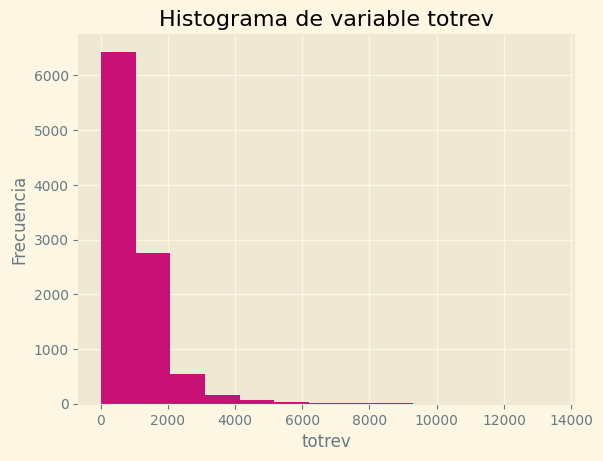

In [72]:
plt.style.use('Solarize_Light2')
plt.hist(df3["totrev"],bins=13,color="#c91076")
plt.title('Histograma de variable totrev')
plt.xlabel("totrev");plt.ylabel("Frecuencia")
plt.show()

In [73]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### Boxplot

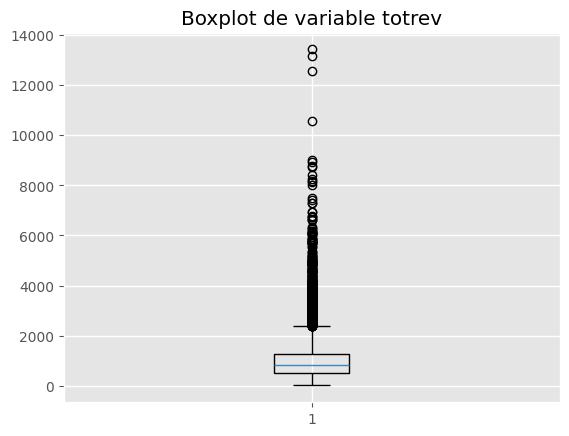

In [74]:
plt.style.use('ggplot')
plt.boxplot(df3["totrev"])
plt.title('Boxplot de variable totrev')
plt.show()

#### Gráficas a partir de `groupby`

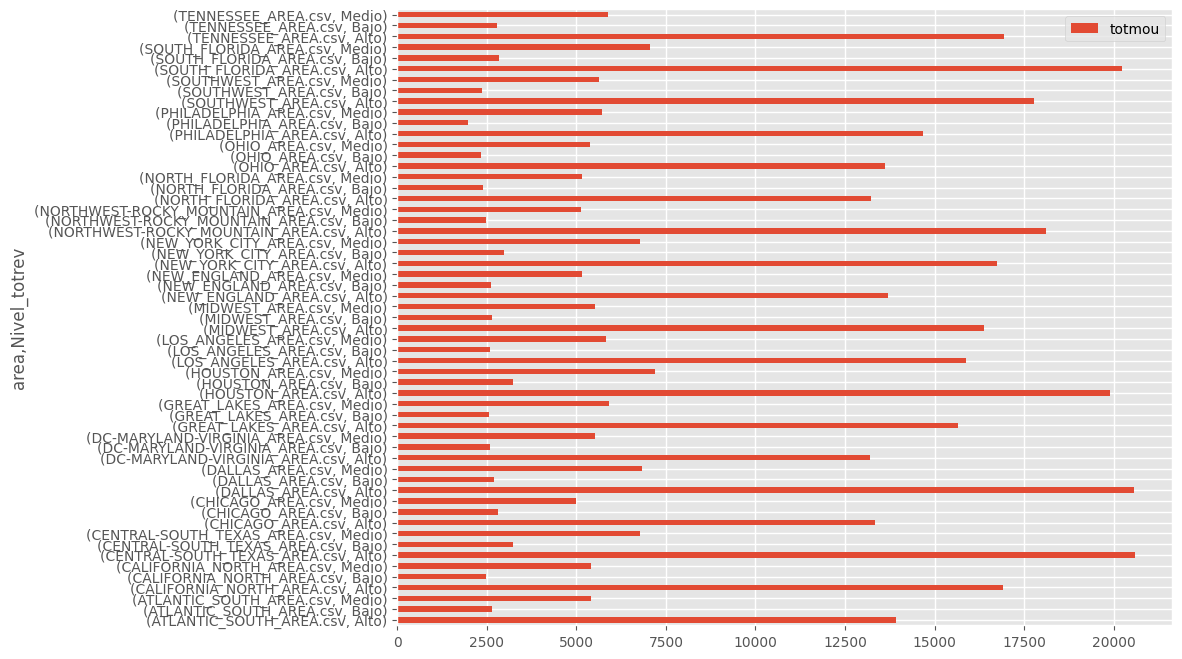

In [75]:
df4=df_con_etiquetas.groupby(['area','Nivel_totrev'])[['totmou']].mean()
df4.plot(kind='barh',figsize=(10,8))
plt.show()

#### Gráficas de `pandas`  

El modulo`.plot()` genera por defecto una gráfica de línea, existen varios gráficos para los `DataFrameGroup`

    - 'line' : Gráfica de línea
    - 'bar' :  Diagrama de barras vertical
    - 'barh' : Diagrama de barras horizontal
    - 'hist' : histograma
    - 'box' : boxplot
    - 'kde' : Kernel de densidad
    - 'area' : Gráfica de área
    - 'pie' : Diagrama de torta
    - 'scatter' : Diagrama de dispersión
    - 'hexbin' : Diagrama de hexágonos

In [76]:
df3.drop(columns=['creditcd_y'],inplace=True)

In [77]:
df3

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area
Customer_ID,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW_ENGLAND_AREA.csv
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC_SOUTH_AREA.csv
1031705,4152.0,577.39,Y,675,3.000000,U,NEW_YORK_CITY_AREA.csv
1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO_AREA.csv
1076695,4155.0,433.16,N,222,0.000000,U,NORTH_FLORIDA_AREA.csv
...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO_AREA.csv
1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST_AREA.csv
1096497,3690.0,294.29,Y,212,0.666667,Y,NEW_ENGLAND_AREA.csv


In [78]:
df3["creditcd_x"].value_counts()

,count
creditcd_x,
Y,6946
N,3051


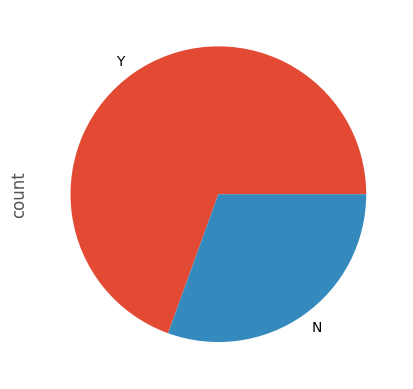

In [79]:
df3["creditcd_x"].value_counts().plot(kind="pie")
plt.show()

Revisando la relación entre las dos variables `totrev` y `totmou`

<Axes: xlabel='totrev', ylabel='totmou'>

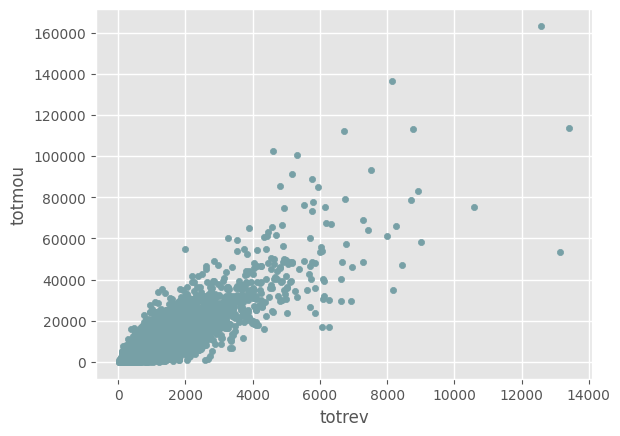

In [80]:
df3.plot(kind="scatter",x='totrev',y='totmou',c='#77a0a6')

### `Seaborn`

<Axes: xlabel='totrev'>

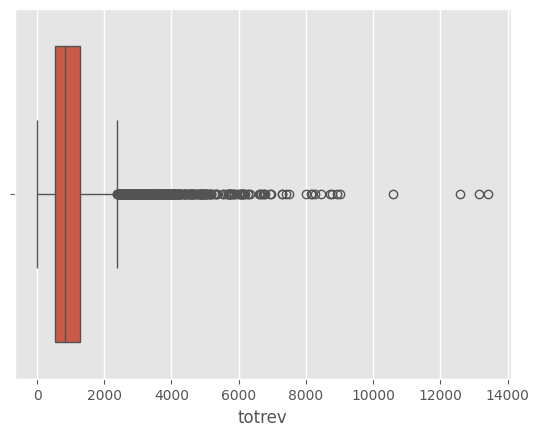

In [81]:
import seaborn as sns
sns.boxplot(df3["totrev"],orient='h')

### Gráficas de parcela

In [82]:
df3

,totmou,totrev,creditcd_x,eqpdays,custcare_Mean,new_cell,area
Customer_ID,,,,,,,
1082423,7269.0,906.58,Y,371,14.333333,U,NEW_ENGLAND_AREA.csv
1069232,13552.0,1172.25,N,83,3.666667,U,ATLANTIC_SOUTH_AREA.csv
1031705,4152.0,577.39,Y,675,3.000000,U,NEW_YORK_CITY_AREA.csv
1089806,1863.0,294.26,Y,218,11.000000,U,CHICAGO_AREA.csv
1076695,4155.0,433.16,N,222,0.000000,U,NORTH_FLORIDA_AREA.csv
...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,0.666667,U,CHICAGO_AREA.csv
1098422,2105.0,583.36,Y,1243,0.000000,U,SOUTHWEST_AREA.csv
1096497,3690.0,294.29,Y,212,0.666667,Y,NEW_ENGLAND_AREA.csv


<Figure size 11600x400 with 0 Axes>

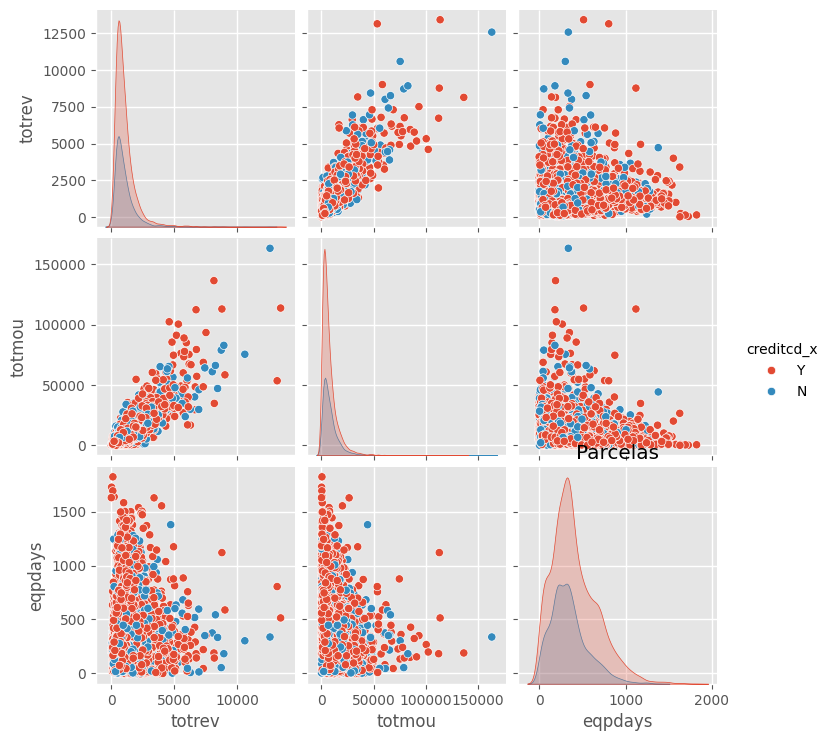

In [83]:
plt.figure(figsize=(116,4))
sns.pairplot(data=df3, hue='creditcd_x', vars=['totrev','totmou','eqpdays'])
plt.title("Parcelas")
plt.show()

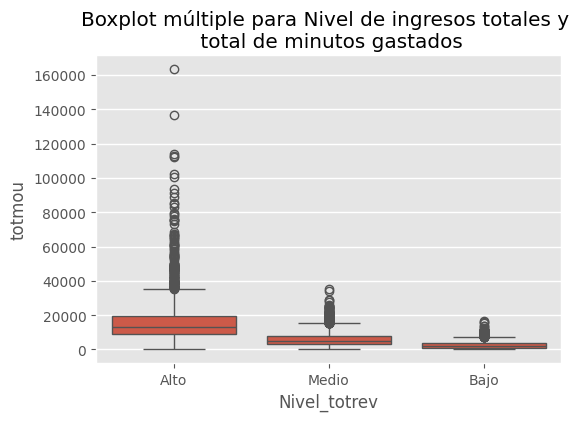

In [84]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Nivel_totrev',y='totmou',data=df_con_etiquetas)
plt.title('Boxplot múltiple para Nivel de ingresos totales y \n total de minutos gastados')
plt.show()

<ipython-input-85-f89c52c407ef>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="totmou", x="Nivel_totrev", kind="box",    data=df_con_etiquetas, height=2, aspect=4, palette='Set2')
<ipython-input-85-f89c52c407ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="totmou", x="Nivel_totrev", kind="violin", data=df_con_etiquetas, height=4, aspect=4, palette='Set2')


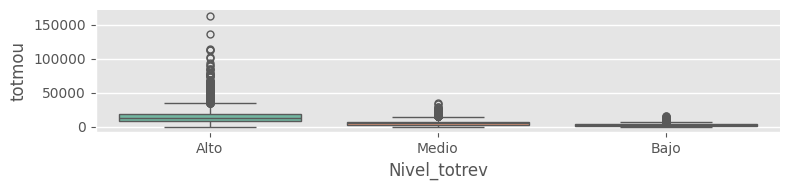

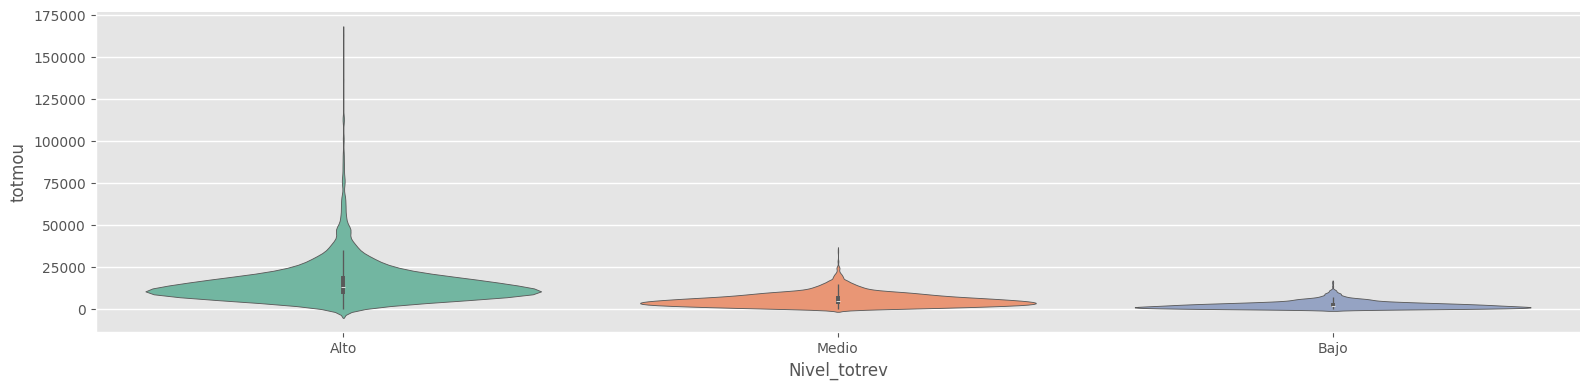

In [85]:
sns.catplot(y="totmou", x="Nivel_totrev", kind="box",    data=df_con_etiquetas, height=2, aspect=4, palette='Set2')
sns.catplot(y="totmou", x="Nivel_totrev", kind="violin", data=df_con_etiquetas, height=4, aspect=4, palette='Set2')

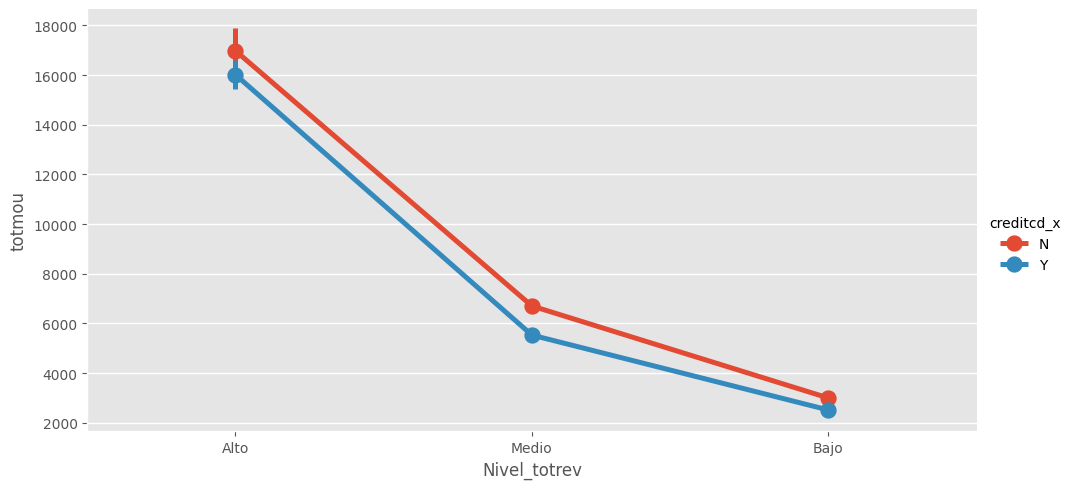

In [86]:
ax = sns.catplot(y="totmou", x="Nivel_totrev", hue='creditcd_x', kind='point',data=df_con_etiquetas, aspect=2)
#ax = sns.catplot(x="Nivel_totrev", kind='count',data=df_con_etiquetas, col='creditcd_x')

### Ejercicio 5

Realice un  boxplot para la variable totmou segmentado por las variable  credict_x y Nivel_totrev

In [87]:
# realice el ejercicio en este espacio

## Resumen


1. Leer datos desde archivos.
2. Agregar y manipular datos .
3. Analizar estadísticas de resumen y reunir información.
4. Usar matplotlib para crear gráficos para hacer análisis visual, además de otras librerías.

Para más información

> [https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)